# 86. Veri Ön İşleme (Pre-Processing Data)

* Sınıflandırma (Classification)
* Regresyon (Regression)
* Model performansının kontrol edilmesi
* Hiper-parametre optimizasyonu

**Scikit-learn**

* Scikit-learn kategorik özellikleri tanınmaz.
* Tüm verilerin nümerik olarak tanımlanması(Encode) gereklidir.
* Dummy variables
    - 0: ilgili kategoriye ait değil
    - 1: ilgili kategoriye ait

**Dummy Variable Tanımlama**

* scikit-learn : OneHotEncoder()
* pandas : get_dummies()

In [1]:
import pandas as pd
data = pd.read_csv('gm_2008_region.csv')
data.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [4]:
data['Region']

0      Middle East & North Africa
1              Sub-Saharan Africa
2                         America
3           Europe & Central Asia
4             East Asia & Pacific
                  ...            
134                       America
135         Europe & Central Asia
136           East Asia & Pacific
137            Sub-Saharan Africa
138            Sub-Saharan Africa
Name: Region, Length: 139, dtype: object

In [5]:
data.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [6]:
data['Region'].unique()

array(['Middle East & North Africa', 'Sub-Saharan Africa', 'America',
       'Europe & Central Asia', 'East Asia & Pacific', 'South Asia'],
      dtype=object)

In [7]:
data.keys()

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region'],
      dtype='object')

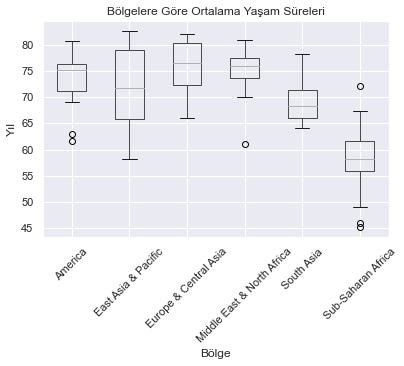

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

data.boxplot('life','Region', rot = 45)
plt.title('Bölgelere Göre Ortalama Yaşam Süreleri')
plt.xlabel('Bölge')
plt.ylabel('Yıl')
plt.suptitle('')
plt.show()

In [18]:
# Dummy Variable Ouşturma
data_dummy = pd.get_dummies(data)
print(data_dummy.columns)
data_dummy.head()

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,1,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,0,1,0,0,0,0


In [19]:
data_dummy2 = pd.get_dummies(data, drop_first = True)
print(data_dummy2.columns)
data_dummy2.head()

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1,0,0,0,0


In [20]:
# Regresyon

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = data_dummy2.drop(['life'], axis = 1)
y = data_dummy2['life']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                   random_state = 30)
ridge = Ridge(alpha = 0.5, normalize = True)
ridge_cv = cross_val_score(ridge, X, y, cv = 5)
print(ridge_cv)

[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]
